# From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in¬†python

In one of the courses during my data science degree, I came across a technique called Markov Chain Monte Carlo, or as it's more commonly referred to, MCMC. The description for this method stated something along the lines of: MCMC is a class of techniques for sampling from a probability distribution and can be used to estimate the distribution of parameters given a set of observations.

Back then, I did not think much of it. I thought, "oh it's just another sampling technique", and I decided I'd read on it when I'd practically need it. This need never emerged, or perhaps it did and I wrongly used something else.

## So why the interest now?

Recently, I have seen a few discussions about MCMC and some of its implementations, specifically the Metropolis-Hastings algorithm and the PyMC3 library. $Markov \: Chain\: Monte\: Carlo\: in\: Python\: - \:A \:Complete\: Real$-$World \:Implementation$ was the article that caught my attention the most. In it, William Koehrsen explains how he was able to learn the approach by applying it to a real world problem: to estimate the parameters of a logistic function that represents his sleeping patterns.


\begin{equation} P(sleep/t,\alpha,\beta)=\dfrac{1}{1+e^{\beta t + \alpha}}  \end{equation}


Mr. Koehrsen uses the PyMC3 implementation of the Metropolis-Hastings algorithm to estimate $\beta$ and $\alpha$, thus computing the entire parameter space, and deriving the most likely logistic model.

## So why am I talking about all that?

I this article, I propose to implement from scratch, my own version of the Metropolis-Hastings algorithm to find parameter distributions for a dummy data example and then of a real world problem.

I figured that if I get my hands dirty, I might finally be able to understand it. I will only use numpy to implement the algorithm, and matplotlib to draw pretty things. Alternatively, scipy can be used to compute the density functions, but I will also show how to implement them using numpy.

## Flow of the article:

    * At first, I will introduce Bayesian inference, MCMC-MH and their mathematical components.
    * Second, I will explain the algorithm using dummy data.
    * Third, I will apply it to a real world problem.

# Part 1: Bayesian inference, Markov Chain Monte Carlo, and Metropolis-Hastings

## A bird's eye view on the philosophy of probabilities

‰∏∫‰∫ÜË∞àËÆ∫Ë¥ùÂè∂ÊñØÊé®ÁêÜÂèäÂÖ∂ÂêéÁª≠ÂÜÖÂÆπÔºåÊàëÂ∞ÜÈ¶ñÂÖàËß£ÈáäË¥ùÂè∂ÊñØÊ¶ÇÁéáËßÇÊòØ‰ªÄ‰πàÔºåÂπ∂Â∞ÜÂÖ∂ÁΩÆ‰∫éÂÖ∂ÂéÜÂè≤ËÉåÊôØ‰∏ã


### Frequentist vs Bayesian thinking

ÂØπÊ¶ÇÁéáÊúâ‰∏§Áßç‰∏ªË¶ÅÁöÑËß£ÈáäÔºöË¥ùÂè∂ÊñØÂ≠¶Ê¥æÂíåÈ¢ëÁéáÂ≠¶Ê¥æ„ÄÇ

‰ªé**È¢ëÁéáÂ≠¶Ê¥æ**ÁöÑËßíÂ∫¶Êù•ÁúãÔºåÊ¶ÇÁéáË°®Á§∫‰∫ã‰ª∂ÂèëÁîüÁöÑÈïøÊúüÈ¢ëÁéá„ÄÇ È¢ëÁéáÂ≠¶Ê¥æÂèØ‰ª•ËØ¥Ôºå**‰ªéÈïøÊúüÊù•Áúã**ÔºåÊäõÁ°¨Â∏ÅÂá∫Áé∞ÂèçÈù¢ÁöÑÊ¶ÇÁéáÁ≠â‰∫é 0.5„ÄÇ ÊØè‰∏™Êñ∞ÂÆûÈ™åÈÉΩÂèØ‰ª•Ë¢´ËßÜ‰∏∫Âêå‰∏ÄÂÆûÈ™åÁöÑÂèØËÉΩÈáçÂ§çÁöÑÊó†ÈôêÂ∫èÂàó‰πã‰∏Ä„ÄÇ Ëøô‰∏™ÊÉ≥Ê≥ïÊòØËØ¥Ôºå‰ªéÈ¢ëÁéáÂ≠¶Ê¥æÊù•ÁúãÔºå‰ø°ÂøµÔºàbeliefÔºâÊòØ‰∏çÂ≠òÂú®ÁöÑ„ÄÇ‰∫ã‰ª∂$x$Âú®$n$Ê¨°ÂÆûÈ™å‰∏≠ÂèëÁîüÁöÑÊ¶ÇÁéáÁ≠â‰∫é$P(x)=\frac{n_x}{n}$ÔºåÂΩì$n\to \infty$Êó∂Â∞±ÂæóÂà∞ÁúüÂÆûÁöÑÊ¶ÇÁéá„ÄÇÈ¢ëÁéáÂ≠¶Ê¥æÁöÑÂ≠¶ËÄÖ‰∏ç‰ºöËØ¥‚ÄúÊàë45%Ôºà0.45ÔºâÁ°Æ‰ø°‰ªäÂ§©ÂçàÈ§êÊúâÁÉ§ÂÆΩÈù¢Êù°‚ÄùÔºåÂõ†‰∏∫‰ªéÈïøËøúÊù•ÁúãËøôÊòØ‰∏ç‰ºöÂèëÁîüÁöÑ„ÄÇÈÄöÂ∏∏ÔºåÈ¢ëÁéáÂ≠¶Ê¥æÂ≠¶ËÄÖÁöÑÊñπÊ≥ïË¢´Áß∞‰∏∫ÂÆ¢ËßÇÊñπÊ≥ïÔºåÂõ†‰∏∫ÂÖ∂‰∏≠Ê≤°ÊúâË°®Ëææ‰ø°ÂøµÂíå/ÊàñÂÖàÈ™å‰∫ã‰ª∂„ÄÇ

Âè¶‰∏ÄÊñπÈù¢ÔºåÂú®Ë¥ùÂè∂ÊñØÂ≠¶Ê¥æÁúãÊù•ÔºåÊ¶ÇÁéáË¢´ËßÜ‰∏∫‰∏ÄÁßç‰ø°ÂøµÁöÑË°®Ëææ„ÄÇ Âõ†Ê≠§ÔºåË¥ùÂè∂ÊñØÂ≠¶Ê¥æÁöÑÂ≠¶ËÄÖ‰ºöËØ¥‚ÄúÊàë 50% (0.5) Á°ÆÂÆö‰ªäÂ§©ÂçàÈ§êÊúâÂçÉÂ±ÇÈù¢‚ÄùÊòØÂÆåÂÖ®ÂêàÁêÜÁöÑ„ÄÇ ÈÄöËøáÁªìÂêàÂÖàÂâçÁöÑ‰ø°ÂøµÂíåÂΩìÂâç‰∫ã‰ª∂ÔºàËØÅÊçÆÔºâÔºåÊàë‰ª¨ÂèØ‰ª•ËÆ°ÁÆóÂêéÈ™åÔºåÂç≥‰ªäÂ§©ÊúâÂçÉÂ±ÇÈù¢ÁöÑ‰ø°Âøµ„ÄÇ Ë¥ùÂè∂ÊñØÂ≠¶Ê¥æËÉåÂêéÁöÑÊÉ≥Ê≥ïÊòØÔºå‰ø°Âøµ‰ºöÈöèÁùÄÊõ¥Â§öËØÅÊçÆÁöÑÂá∫Áé∞ËÄå‰∏çÊñ≠Ë¢´Êõ¥Êñ∞„ÄÇ Áî±‰∫éËøôÁßçÊñπÊ≥ïÂ§ÑÁêÜÁöÑÊòØ‰ø°ÂøµÔºåÂõ†Ê≠§ÈÄöÂ∏∏Ë¢´Áß∞‰∏∫Ê¶ÇÁéáÁöÑ‰∏ªËßÇËßÇÁÇπÔºà‰∏ªËßÇÊ¶ÇÁéáÔºâ„ÄÇ

### Bayesian inference


<img src="data/Thomas-Bayes.jpg" style="width: 400px;"> $\quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad $  *A supposed portrait of Thomas Bayes, an English statistician, philosopher, and theologian. Image Credit: [Farnam Street](https://fs.blog/2018/09/bayes-theorem/).*

Âú®ÂÜ≥Á≠ñÂì≤Â≠¶‰∏≠ÔºåË¥ùÂè∂ÊñØÊé®Êñ≠‰∏éË¥ùÂè∂ÊñØÊ¶ÇÁéáÂØÜÂàáÁõ∏ÂÖ≥ÔºåÂõ†‰∏∫ÂÆÉÂà©Áî®ÂÖàÈ™åÔºàpriorsÔºâÔºåËØÅÊçÆÔºàevidenceÔºâÂíå‰ººÁÑ∂ÔºàlikelihoodÔºâÊù•ËÆ°ÁÆóÂêéÈ™åÔºàposteriorÔºâ„ÄÇ‰æãÂ¶ÇÔºåÁªôÂÆö‰∫ã‰ª∂BÔºå‰∫ã‰ª∂AÂèëÁîüÁöÑÊ¶ÇÁéáÊòØÂ§öÂ∞ëÔºüÁ≠îÊ°àÁî±Ë¥ùÂè∂ÊñØÂÖ¨ÂºèÁªôÂá∫Ôºö$P(A/B)=\dfrac{P(B/A)P(A)}{P(B)}$


* $P(A/B)$ ‰∏∫ **ÂêéÈ™åÔºàposteriorÔºâ**„ÄÇ ÂÆÉÊòØÊàë‰ª¨Â∏åÊúõËÆ°ÁÆóÂæóÂà∞ÁöÑ„ÄÇ

* $P(B/A)$ ‰∏∫ **‰ººÁÑ∂ÔºàlikelihoodÔºâ**„ÄÇÂú®AÂèëÁîüÁöÑÊÉÖÂÜµ‰∏ãÔºåBÂèëÁîüÁöÑÂèØËÉΩÊÄß„ÄÇ

* $P(A)$ ‰∏∫ **ÂÖàÈ™åÔºàpriorÔºâ**„ÄÇ‰∏çËÄÉËôëËØÅÊçÆÁöÑÊÉÖÂÜµ‰∏ãÔºå‰∫ã‰ª∂AÂèëÁîüÁöÑÂèØËÉΩÊÄß„ÄÇ

* $P(B)$ ‰∏∫ **ËØÅÊçÆÔºàevidenceÔºâ**„ÄÇ‰∏çËÄÉËôë‰∫ã‰ª∂ÔºåËØÅÊçÆBÂèëÁîüÁöÑÂèØËÉΩÊÄß„ÄÇ 

Âú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨ÊúÄÊÑüÂÖ¥Ë∂£ÁöÑÊòØÂ¶Ç‰∏ãË¥ùÂè∂ÊñØÂÖ¨ÂºèÁöÑÂÖ∑‰ΩìË°®Ëø∞Ôºö


$P(\theta/D)=\dfrac{P(D/\theta)P(\theta)}{P(D)}$ ÂÖ∂‰∏≠, $P(\theta/D)$ ‰∏∫ **ÂêéÈ™å**, $P(D/\theta)$ ‰∏∫ **‰ººÁÑ∂**, $P(\theta)$ ‰∏∫ **ÂÖàÈ™å** , $P(D)$ ‰∏∫ **ËØÅÊçÆ**.

Êàë‰ª¨ÊÉ≥ÊâæÂà∞ $\theta$ ÁöÑÊúÄÂèØËÉΩÂàÜÂ∏ÉÔºåÂç≥Ëß£ÈáäÊï∞ÊçÆ$D$ÁöÑÊ®°ÂûãÁöÑÂèÇÊï∞„ÄÇ


ËÆ°ÁÆóÂÖ∂‰∏≠‰∏Ä‰∫õÊ¶ÇÁéáÂèØËÉΩÂæàÁÉ¶ÔºåÂ∞§ÂÖ∂ÊòØËØÅÊçÆ $P(D)$„ÄÇ Ê≠§Â§ñÔºåËøòÂèØËÉΩÂá∫Áé∞ÂÖ∂‰ªñÈóÆÈ¢òÔºå‰æãÂ¶ÇÁ°Æ‰øùÂÖ±ËΩ≠ÔºàconjugacyÔºâÁöÑÈóÆÈ¢òÔºåÊàë‰∏ç‰ºöÂú®Êú¨Êñá‰∏≠Ê∑±ÂÖ•Êé¢ËÆ®„ÄÇ Âπ∏ËøêÁöÑÊòØÔºå‰∏Ä‰∫õÊäÄÊúØÔºåÂç≥ MCMCÔºåÂÖÅËÆ∏Êàë‰ª¨‰ªéÂêéÈ™åÈááÊ†∑ÔºåÂπ∂ÂæóÂà∞ÂèÇÊï∞ÁöÑÂàÜÂ∏ÉÔºåËÄå‰∏çÂøÖÊãÖÂøÉËØÅÊçÆÁöÑËÆ°ÁÆóÔºå‰πü‰∏çÂøÖËÄÉËôëÂÖ±ËΩ≠„ÄÇ


### Markov Chain Monte Carlo

MCMC ÂÖÅËÆ∏Êàë‰ª¨‰ªé‰ªª‰ΩïÊó†Ê≥ïÁõ¥Êé•ÈááÊ†∑ÁöÑÂàÜÂ∏É‰∏≠ÊäΩÂèñÊ†∑Êú¨„ÄÇ ÂÆÉÂèØÁî®‰∫é‰ªéÂèÇÊï∞ÁöÑÂêéÈ™åÂàÜÂ∏É‰∏≠ÈááÊ†∑„ÄÇ
ÂÆÉÂú®ËÆ∏Â§öÂ∫îÁî®‰∏≠ÂèñÂæó‰∫ÜÂæàÂ§ßÁöÑÊàêÂäüÔºå‰æãÂ¶ÇÂú®ÁªôÂÆö‰∏ÄÁªÑËßÇÂØüÁªìÊûúÂíå‰∏Ä‰∫õÂÖàÈ™å‰ø°ÂøµÁöÑÊÉÖÂÜµ‰∏ãËÆ°ÁÆóÂèÇÊï∞ÁöÑÂàÜÂ∏ÉÔºå‰ª•ÂèäËÆ°ÁÆóÁâ©ÁêÜÂ≠¶ÂíåÊï∞Â≠óÈÄö‰ø°‰∏≠ÁöÑÈ´òÁª¥ÁßØÂàÜ„ÄÇ


Bottom line: **It can be used to compute the distribution over the parameters, given a set of observations and a prior belief.**

### Metropolis-Hastings

MCMC ÊòØ‰∏ÄÁ±ªÊñπÊ≥ï„ÄÇ Metropolis-Hastings ÊòØ MCMC ÁöÑÂÖ∑‰ΩìÂÆûÁé∞„ÄÇ ‰∏é Gibbs ÈááÊ†∑ÂíåÊãíÁªùÈááÊ†∑Áõ∏ÂèçÔºåÂÆÉÂú®È´òÁª¥Á©∫Èó¥‰∏≠ËøêË°åËâØÂ•Ω„ÄÇ

ËøôÁßçÊäÄÊúØÈúÄË¶Å‰∏Ä‰∏™ÁÆÄÂçïÁöÑÂàÜÂ∏É  $Q(\theta^\prime/\theta)$ÔºåÁß∞‰∏∫ÊèêËÆÆÂàÜÂ∏É**proposal distribution**ÔºàÊàëÂñúÊ¨¢Áß∞‰πã‰∏∫ËøáÊ∏°Ê®°Âûã**transition model**ÔºâÔºåÊù•‰ªé‰∏Ä‰∏™ÈöæËß£ÁöÑÂêéÈ™åÂàÜÂ∏É$P(\Theta=\theta/D)$‰∏≠ÈááÊ†∑„ÄÇ

Metropolis-Hastings ‰ΩøÁî® $Q$ Âú®ÂàÜÂ∏ÉÁ©∫Èó¥‰∏≠ÈöèÊú∫Ê∏∏Ëµ∞ÔºåÊ†πÊçÆÊ†∑Êú¨ÁöÑÂèØËÉΩÊÄßÊé•ÂèóÊàñÊãíÁªùË∑≥ËΩ¨Âà∞Êñ∞‰ΩçÁΩÆ„ÄÇ ËøôÁßç‚ÄúÊó†ËÆ∞ÂøÜ‚ÄùÁöÑÈöèÊú∫Ê∏∏Ëµ∞ÊòØ MCMC ÁöÑ‚ÄúÈ©¨Â∞îÂèØÂ§´Èìæ‚ÄùÈÉ®ÂàÜ„ÄÇ

ÊØè‰∏™Êñ∞Ê†∑Êú¨ÁöÑ‚Äú‰ººÁÑ∂‚ÄùÁî±ÂáΩÊï∞ $f$ ÂÜ≥ÂÆö„ÄÇ ËøôÂ∞±ÊòØ‰∏∫‰ªÄ‰πà $f$ ÂøÖÈ°ª‰∏éÊàë‰ª¨Ë¶Å‰ªé‰∏≠ÈááÊ†∑ÁöÑÂêéÈ™åÊàêÊ≠£ÊØî„ÄÇ $f$ ÈÄöÂ∏∏Ë¢´ÈÄâÊã©‰∏∫Ë°®Á§∫ËøôÁßçÊØî‰æãÁöÑÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞„ÄÇ

‰∏∫‰∫ÜÂæóÂà∞‰∏Ä‰∏™ÁªÑÊñ∞ÁöÑÂèÇÊï∞ÔºåÂè™ÈúÄÂü∫‰∫éÂΩìÂâçÂèÇÊï∞ $\theta$ÔºåÂà©Áî® $Q(\theta^\prime/\theta)$ ÈöèÊú∫ÈááÊ†∑ÔºåÂæóÂà∞Êñ∞ÁöÑÂèÇÊï∞ $\theta^\prime$ „ÄÇ‰æãÂ¶ÇÔºåÂùáÂÄº‰∏∫ $\theta$ ÔºåÊ†áÂáÜÂ∑Æ‰∏∫ $\sigma$ ÁöÑÊ≠£ÊÄÅÂàÜÂ∏ÉÔºö $Q(\theta^\prime/\theta) = \mathcal{N}(\theta, \sigma)$

‰∏∫‰∫ÜÂà§Êñ≠ÊòØÊé•ÂèóËøòÊòØÊãíÁªù $\theta^\prime$ ÔºåÂøÖÈ°ª‰∏∫ÊØè‰∏™Êñ∞ÁöÑ $\theta^\prime$ ËÆ°ÁÆóÊØîÁéáÔºö$\dfrac{P(\theta^\prime/D)}{P(\theta/D)}$ „ÄÇÂà©Áî®Ë¥ùÂè∂ÊñØÂÖ¨ÂºèÂèòÊç¢‰∏∫Ôºö$\dfrac{P(D/\theta^\prime)P(\theta^\prime)}{P(D/\theta)P(\theta)}$ ÔºàËØÅÊçÆ $P(D)$ Ë¢´Ê∂àÊéâÔºâ$\dfrac{P(D/\theta^\prime)P(\theta^\prime)}{P(D/\theta)P(\theta)}$ Á≠â‰∫é$\dfrac{\prod_i^nf(d_i/\Theta=\theta^\prime)P(\theta^\prime)}{\prod_i^nf(d_i/\Theta=\theta)P(\theta)}$


$$\begin{equation} P(\text{accept}) = \begin{cases}\dfrac{\prod_i^nf(d_i/\Theta=\theta^\prime)P(\theta^\prime)}{\prod_i^nf(d_i/\Theta=\theta)P(\theta)}, & \prod_i^nf(d_i/\Theta=\theta)P(\theta)>\prod_i^nf(d_i/\Theta=\theta^\prime)P(\theta^\prime) \\  1, & \prod_i^nf(d_i/\Theta=\theta)P(\theta)\leq \prod_i^nf(d_i/\Theta=\theta^\prime)P(\theta^\prime) \end{cases} \end{equation}$$

ËøôÊÑèÂë≥ÁùÄÂ¶ÇÊûú $Œ∏'$ ÊØîÂΩìÂâçÁöÑ $Œ∏$ Êõ¥ÊúâÂèØËÉΩÔºåÈÇ£‰πàÊàë‰ª¨ÊÄªÊòØÊé•Âèó $Œ∏'$„ÄÇ Â¶ÇÊûúÂÆÉÁöÑÂèØËÉΩÊÄßÂ∞è‰∫éÂΩìÂâçÁöÑ $Œ∏$ÔºåÈÇ£‰πàÊàë‰ª¨ÂèØËÉΩ‰ºö‰ª•‰ººÁÑ∂ÁöÑÊØî‰æã‰∏∫Ê¶ÇÁéáÈöèÊú∫Êé•ÂèóÊàñÊãíÁªù„ÄÇ

*Ê≥®ÊÑèÔºöÂ¶ÇÊûúÂØπÂèÇÊï∞Ê≤°ÊúâÂÅèÂ•ΩÊàñÈôêÂà∂ÔºåÈÄöÂ∏∏‰ºöÊ∂àÂéªÂÖàÈ™åÈÉ®ÂàÜ„ÄÇ*


#### Metropolis-Hastings ÁÆóÊ≥ï:
* given:
    * $f$, ÈááÊ†∑ÂèÇÊï∞ÁöÑÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞ÔºàPDFÔºâ
    * $Q$, ËøáÊ∏°Ê®°ÂûãÔºàtransition modelÔºâ
    * $\theta_0$, ÂàùÂßã $\theta$
    * $\theta = \theta_0$
    
* for $n$ iterations
    * $p =  f(D/\Theta=\theta)P(\theta)$
    *  $\theta^\prime = Q(\theta_i)$ 
    *  $p^\prime = f(D/\Theta=\theta^\prime)P(\theta^\prime)$ 
    *  $ratio = \dfrac{p^\prime}{p}$ 
    * ‰ªéÂùáÂåÄÂàÜÂ∏É‰∏≠ÁîüÊàêÈöèÊú∫Êï∞ $r$ in [0,1]
    *  if $r<ratio$: 
        * set $\theta_i = \theta^\prime$
                        

In [2]:
import numpy as np
import scipy
import scipy.stats
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline

# Part 2: ËôöÊãü‰æãÂ≠ê

## Step 1: ÁîüÊàêÊï∞ÊçÆ

Êàë‰ª¨‰ªé $\mu$ = 10Ôºå $\sigma$= 3 ÁöÑÊ≠£ÊÄÅÂàÜÂ∏É‰∏≠ÁîüÊàê 30,000 ‰∏™Ê†∑Êú¨Ôºå‰ΩÜÂè™ÊúâÂÖ∂‰∏≠ÁöÑ 1000 ‰∏™ÂèØË¢´ËßÇÂØü„ÄÇ

9.901522941859275

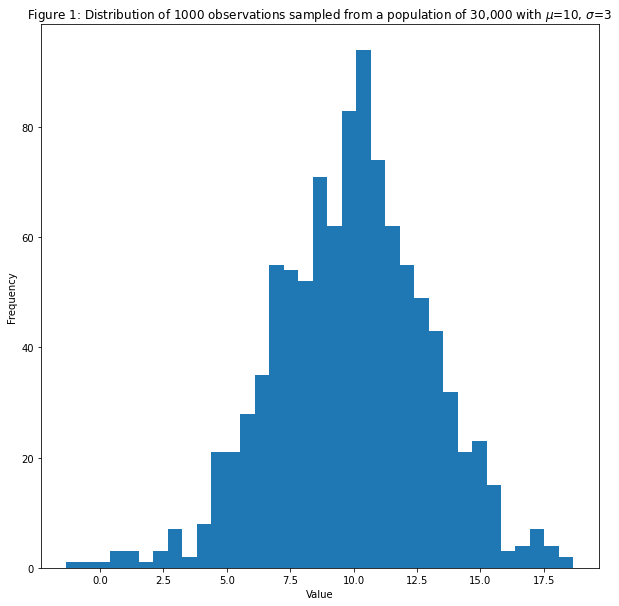

In [3]:
mod1=lambda t:np.random.normal(10,3,t)

# ‰ªéÂùáÂÄº‰∏∫10ÔºåÊ†áÂáÜÂ∑Æ‰∏∫3ÁöÑÈ´òÊñØÂàÜÂ∏É‰∏≠ÈááÊ†∑ÊûÑÈÄ†30000‰∏™Êï∞ÊçÆÊ†∑Êú¨
population = mod1(30000)
# ÂÅáËÆæ‰ªÖËÉΩËßÇÊµãÂà∞ÂÖ∂‰∏≠ÁöÑ1000‰∏™Ê†∑Êú¨
observation = population[np.random.randint(0, 30000, 1000)]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35,)
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Figure 1: Distribution of 1000 observations sampled from a population of 30,000 with $\mu$=10, $\sigma$=3")
mu_obs=observation.mean()
mu_obs

## Step 2: Êàë‰ª¨ÈúÄË¶Å‰ªÄ‰πà?

Êàë‰ª¨Â∏åÊúõÂà©Áî®1000‰∏™ËßÇÊµãÊï∞ÊçÆÊâæÂà∞$\sigma_{obs}$ÁöÑÂàÜÂ∏É„ÄÇÁ≤æ‰∫éÊï∞Â≠¶ÁöÑ‰∫∫ÂèØËÉΩ‰ºöËØ¥Ôºå $\sigma$ ÁöÑËÆ°ÁÆóÊòØÊúâÂÖ¨ÂºèÁöÑÔºö$\sigma=\sqrt{\dfrac{1}{n}\sum_i^n(d_i-\mu)^2}$)ÔºÅ‰∏∫‰ªÄ‰πàÊàë‰ª¨Ë¶ÅÊäΩÊ†∑Á≠âÁ≠â?? Â•ΩÂêßÔºåËøôÂè™ÊòØ‰∏Ä‰∏™ËôöÊãüÊï∞ÊçÆÁ§∫‰æãÔºåÁúüÊ≠£ÁöÑÈóÆÈ¢òÂú®Á¨¨ 3 ÈÉ®ÂàÜÔºåÂÖ∂‰∏≠ÁöÑÂèÇÊï∞Êó†Ê≥ïÁõ¥Êé•ËÆ°ÁÆó„ÄÇÂè¶Â§ñÔºåÂú®ËøôÈáåÔºåÊàë‰ª¨‰∏çÊòØËØïÂõæÊâæÂà∞ $\sigma$ ÁöÑÂÄºÔºåËÄåÊòØËØïÂõæËÆ°ÁÆó $\sigma$ ÂèØËÉΩÂÄºÁöÑÂàÜÂ∏É„ÄÇ


## Step 3: ÂÆö‰πâPDFÂíåËøáÊ∏°ÂáΩÊï∞

‰ªéÂõæ 1 ‰∏≠ÔºåÊàë‰ª¨ÂèØ‰ª•ÁúãÂá∫Êï∞ÊçÆÂëàÊ≠£ÊÄÅÂàÜÂ∏É„ÄÇ Âà©Áî® 1000 ‰∏™Ê†∑Êú¨ÂèØ‰ª•ÂæàÂÆπÊòìÂú∞ËÆ°ÁÆóÂá∫Âπ≥ÂùáÂÄº„ÄÇ ËøôÊ†∑ÔºåÊàë‰ª¨ÂæóÂà∞‰æã$\mu_{obs}=9.8$„ÄÇ
„ÄêÁÆÄÂåñËµ∑ËßÅÔºåËøôÈáåÂè™Áî®MCMC‰º∞ËÆ°Ê†áÂáÜÂ∑Æ„Äë

### ËøáÊ∏°Ê®°Âûã/ÊèêËÆÆÂàÜÂ∏É:

ÂØπ‰∫éËøáÊ∏°Ê®°ÂûãÔºåÊàë‰ª¨Ê≤°ÊúâÂÖ∑‰ΩìÁöÑÂàÜÂ∏ÉÔºåÊâÄ‰ª•ÈÄâÊã©‰∏Ä‰∏™ÁÆÄÂçïÁöÑÔºöÊ≠£ÊÄÅÂàÜÂ∏ÉÔºÅ

\begin{equation} Q(\sigma_{new} / \sigma_{current}) = N(\mu=\sigma_{current},\sigma'=1) \end{equation}

Ê≥®ÊÑè $\sigma'$ ‰∏é $\sigma_{new}$ Âíå $\sigma_{current}$ Êó†ÂÖ≥„ÄÇÂÆÉÂè™ÊòØÁÆÄÂçïÂú∞ÊåáÂÆö‰∫ÜÂèÇÊï∞Á©∫Èó¥ÁöÑÊ†áÂáÜÂ∑ÆÔºåÂèØ‰ª•ÊòØ‰ªª‰ΩïÈúÄË¶ÅÁöÑÂÄº„ÄÇ ÂÆÉÂè™ÂΩ±ÂìçÁÆóÊ≥ïÁöÑÊî∂ÊïõÊó∂Èó¥„ÄÇ

### Ê¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞PDF:

Áî±‰∫é $f$ Â∫î‰∏éÂêéÈ™åÊàêÊ≠£ÊØîÔºåÊàë‰ª¨ÈÄâÊã© $f$ ‰∏∫‰ª•‰∏ãÊ¶ÇÁéáÂØÜÂ∫¶ÂáΩÊï∞ (PDF)ÔºåÂØπ‰∫éÊï∞ÊçÆ $D$ ‰∏≠ÁöÑÊØè‰∏™Êï∞ÊçÆÁÇπ $d_i$Ôºö

\begin{equation} f(d_i/ \mu,\sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}}e^{-\dfrac{(d_i-\mu)^2}{2\sigma^2}} \end{equation}

Âú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠Ôºå $\theta$Áî±‰∏§‰∏™ÂÄºÁªÑÊàêÔºö$[\mu,\sigma]$Ôºå$\mu$‰∏∫Â∏∏Êï∞$\mu = \mu_{obs}$„ÄÇ


## Step 4: ÂÆö‰πâÊé•ÂèóÂà∞ÊòØÊãíÁªù $\sigma_{new}$: 

Êàë‰ª¨Êé•Âèó$\sigma_{new}$ÔºåÂ¶ÇÊûúÊª°Ë∂≥Ôºö


$\dfrac{Likelihood(D/\mu_{obs},\sigma_{new})*prior(\mu_{obs},\sigma_{new})}{Likelihood(D/\mu_{obs},\sigma_{current})*prior(\mu_{obs},\sigma_{current})}>1     \quad \quad \quad \quad \quad      (1)$

Â¶ÇÊûúËøô‰∏™ÊØîÁéáÂ∞è‰∫éÊàñÁ≠â‰∫é 1ÔºåÈÇ£‰πàÊàë‰ª¨Â∞ÜÂÆÉ‰∏é [0,1] ‰∏≠ÂùáÂåÄÁîüÊàêÁöÑÈöèÊú∫Êï∞ËøõË°åÊØîËæÉ„ÄÇ Â¶ÇÊûúÊØîÁéáÂ§ß‰∫éÈöèÊú∫Êï∞ÔºåÊàë‰ª¨Êé•Âèó $\sigma_{new}$ÔºåÂê¶ÂàôÊàë‰ª¨ÊãíÁªùÂÆÉ„ÄÇ

*Ê≥®ÊÑèÔºöÁî±‰∫éÊàë‰ª¨Â∞ÜËÆ°ÁÆóËøô‰∏™ÊØîÁéáÊù•ÂÜ≥ÂÆöÂ∫îËØ•Êé•ÂèóÂì™‰∫õÂèÇÊï∞ÔºåÂõ†Ê≠§ÂøÖÈ°ªÁ°Æ‰øùÈááÁî®ÁöÑÂáΩÊï∞ $f$ ‰∏éÂêéÈ™åÊú¨Ë∫´$P(\sigma/ D,\mu)$ ÊàêÊ≠£ÊØîÔºåÂú®Êú¨‰æã‰∏≠Â∑≤ÂæóÂà∞È™åËØÅ„ÄÇ ($f$ ÊòØ P ÁöÑ PDF)*


## Step 5: ÂÆö‰πâÂÖàÈ™åÂíå‰ººÁÑ∂

### ÂÖàÈ™å $P(\theta)$ ÂèØÁî®$P(\sigma)$‰ª£ÊõøÔºåÂõ†‰∏∫ $\mu$ ‰∏∫Â∏∏Êï∞:

Êàë‰ª¨ÂØπ $\sigma_{new}$ Âíå $\sigma_{current}$ ÂèØ‰ª•ÈááÁî®ÁöÑÂÄºÊ≤°Êúâ‰ªª‰ΩïÂÅèÂ•Ω„ÄÇ ÂîØ‰∏ÄÂÄºÂæóÊ≥®ÊÑèÁöÑÊòØÔºå‰ªñ‰ª¨Â∫îËØ•ÊòØÊ≠£ÂÄº„ÄÇ ‰∏∫‰ªÄ‰πàÔºü Áõ¥ËßÇÂú∞ËØ¥ÔºåÊ†áÂáÜÂ∑ÆË°°ÈáèÁöÑÊòØÁ¶ªÂ∑Æ„ÄÇÊï∞Â≠¶‰∏äÔºå$\sigma=\sqrt{\dfrac{1}{n}\sum_i^n(d_i-\mu)^2}$Ôºå‰∏Ä‰∏™Êï∞ÁöÑÂπ≥ÊñπÊ†π‰∏çËÉΩ‰∏∫Ë¥üÊï∞„ÄÇ Êàë‰ª¨Âú®‰∫ãÂÖà‰∏•Ê†ºÊâßË°åËøô‰∏ÄÁÇπ„ÄÇ


### ‰ººÁÑ∂ 

‰∏ÄÁªÑËßÇÂØüÂÄº $D$ ÁöÑÊÄª‰ººÁÑ∂‰∏∫Ôºö$Likelihood(D/\mu_{obs},\sigma_{a}) = \prod_i^n f(d_i/\mu_{obs},\sigma_{a}) $ÔºåÂÖ∂‰∏≠ $a=new \: or \: current$„ÄÇ

Âú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨ÂØπÂÖàÈ™åÂáΩÊï∞Âíå‰ººÁÑ∂ÂáΩÊï∞ÂèñÂØπÊï∞„ÄÇ ‰∏∫‰ªÄ‰πàË¶ÅÂèñÂØπÊï∞Ôºü ‰ªÖ‰ªÖÊòØÂõ†‰∏∫ÂÆÉÊúâÂä©‰∫éÊï∞ÂÄºÁ®≥ÂÆöÊÄßÔºåÂç≥‰πò‰ª•Êï∞ÂçÉ‰∏™ËæÉÂ∞èÁöÑÂÄºÔºàÊ¶ÇÁéá„ÄÅÂèØËÉΩÊÄßÁ≠âÔºâ‰ºöÂØºËá¥Á≥ªÁªüÂÜÖÂ≠ò‰∏ãÊ∫¢ÔºåËÄåÂèñÂØπÊï∞ÊòØ‰∏Ä‰∏™ÂÆåÁæéÁöÑËß£ÂÜ≥ÊñπÊ°àÔºåÂõ†‰∏∫ÂÆÉÂ∞Ü‰πòÊ≥ïËΩ¨Êç¢‰∏∫Âä†Ê≥ïÂπ∂Â∞ÜÂ∞èÁöÑÊ≠£Êï∞ËΩ¨Êç¢‰∏∫‰∏çÈÇ£‰πàÂ∞èÁöÑË¥üÊï∞„ÄÇ


Âõ†Ê≠§ÔºåÊàë‰ª¨Âü∫‰∫éÂºè $(1)$ ÔºåÂæóÂà∞ÁöÑÊé•ÂèóÊù°‰ª∂‰∏∫Ôºö


Â¶ÇÊûúÊª°Ë∂≥‰∏ãÂºèÂàôÊé•Âèó $\sigma_{new}$:

$\quad \quad \quad \quad \quad Log(Likelihood(D/\mu_{obs},\sigma_{new})) + Log(prior(\mu_{obs},\sigma_{new})) - (Log(Likelihood(D/\mu_{obs},\sigma_{current}))+$

$Log(prior(\mu_{obs},\sigma_{current})))>0$

$\quad$

 Equivalent to:
 
 $\sum_i^nLog(f(d_i/\mu_{obs},\sigma_{new})) + Log(prior(\mu_{obs},\sigma_{new})) - \sum_i^nLog(f(d_i/\mu_{obs},\sigma_{current}))-Log(prior(\mu_{obs},\sigma_{current}))>0$
 
 $\quad$
 
 
  Equivalent to:
  
  $\sum_i^nLog(f(d_i/\mu_{obs},\sigma_{new})) + Log(prior(\mu_{obs},\sigma_{new})) > \sum_i^nLog(f(d_i/\mu_{obs},\sigma_{current}))+Log(prior(\mu_{obs},\sigma_{current}))$
  
   $\quad$
  
  Equivalent to: 
  
  $\sum_i^n -nLog(\sigma_{new}\sqrt{2\pi})-\dfrac{(d_i-\mu_{obs})^2}{2\sigma_{new}^2} + Log(prior(\mu_{obs},\sigma_{new})) \quad > $
  
 $ \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad \quad(2)$
 $ \quad \quad \quad \quad \quad \sum_i^n -nLog(\sigma_{current}\sqrt{2\pi})-\dfrac{(d_i-\mu_{obs})^2}{2\sigma_{current}^2}+Log(prior(\mu_{obs},\sigma_{current}))  $
  
  
  ÈÄöËøá‰ªéÂØπÊï∞‰∏≠ÂèñÂá∫Âπ≥ÊñπÊ†πÂíå‰πòÊ≥ïÔºåÂèØ‰ª•ÂØπ‰∏äÂºèËøõ‰∏ÄÊ≠•ÁÆÄÂåñ„ÄÇ

In [4]:
# tranistion model ÂÆö‰πâ‰∫ÜÂ¶Ç‰Ωï‰ªé sigma_current Âà∞ sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],0.5,(1,))[0]]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data given a sigma (new or current) according to equation (2)
def manual_log_like_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

#Same as manual_log_like_normal(x,data), but using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(scipy.stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik + np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

## Step 6: ‰ΩøÁî®ÂàùÂßãÂèÇÊï∞ËøêË°åÁÆóÊ≥ïÂπ∂Êî∂ÈõÜÊé•ÂèóÂíåÊãíÁªùÁöÑÊ†∑Êú¨

In [5]:
accepted, rejected = metropolis_hastings(manual_log_like_normal,prior,transition_model,[mu_obs,0.1], 50000,observation,acceptance)

In [6]:
len(accepted), len(rejected)

(8468, 41532)

### Êé•ÂèóÂíåÊãíÁªùÊ†∑Êú¨ÂàÜÊûê

ÁÆóÊ≥ïÊé•Âèó‰∫Ü8468‰∏™$\sigma$ÁöÑÊ†∑Êú¨ÔºàÊØèÊ¨°ÊØèË°åÁªìÊûúÂèØËÉΩ‰∏çÂêåÔºâÔºåÊúÄÂêé10‰∏™Ê†∑Êú¨ÁöÑÂÄº‰∏∫Ôºö

In [7]:
accepted[-10:,1]

array([3.00768879, 3.00895995, 2.98154922, 3.07620254, 3.05175018,
       2.97509239, 2.93066518, 3.05339625, 2.91883224, 2.86502796])

In [8]:
print(accepted.shape)

(8468, 2)


(8468, 2)

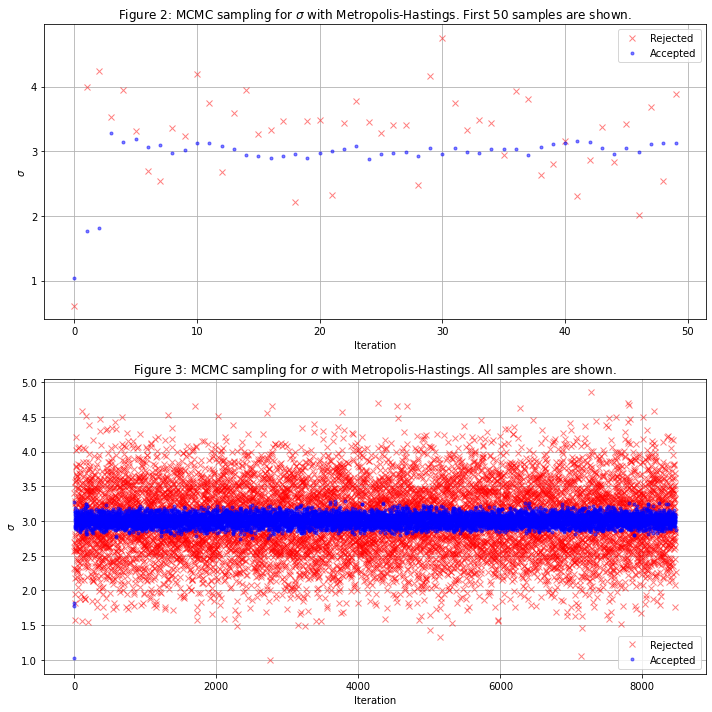

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,1,1)

ax.plot( rejected[0:50,1], 'rx', label='Rejected',alpha=0.5)
ax.plot( accepted[0:50,1], 'b.', label='Accepted',alpha=0.5)
ax.set_xlabel("Iteration")
ax.set_ylabel("$\sigma$")
ax.set_title("Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.")
ax.grid()
ax.legend()



ax2 = fig.add_subplot(2,1,2)
to_show=-accepted.shape[0]
ax2.plot( rejected[to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax2.plot( accepted[to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("$\sigma$")
ax2.set_title("Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.")
ax2.grid()
ax2.legend()



fig.tight_layout()
accepted.shape

Âõ†Ê≠§Ôºå‰ªéÂàùÂßã‰∏∫ 0.1 ÁöÑ œÉ ÂºÄÂßãÔºåÁÆóÊ≥ïÂæàÂø´Êî∂ÊïõÂà∞È¢ÑÊúüÂÄº 3„ÄÇ‰πüÂ∞±ÊòØËØ¥ÔºåÂÆÉÂè™ÊòØÂú®‰∏ÄÁª¥Á©∫Èó¥‰∏≠ÈááÊ†∑‚Ä¶‚Ä¶„ÄÇ ÊâÄ‰ª•ËøôÂπ∂‰∏çÂ•áÊÄ™„ÄÇ

### ÊúÄÂàù 25% ÁöÑ ùúé ÂÄºËßÜ‰∏∫‚Äúburn-in‚ÄùÔºåÂõ†Ê≠§Â∞ÜÂÖ∂‰∏¢ÂºÉ

### ÂèØËßÜÂåñ ùúé ÁöÑËøπÁ∫øÂíåËøπÁ∫øÁöÑÁõ¥ÊñπÂõæ

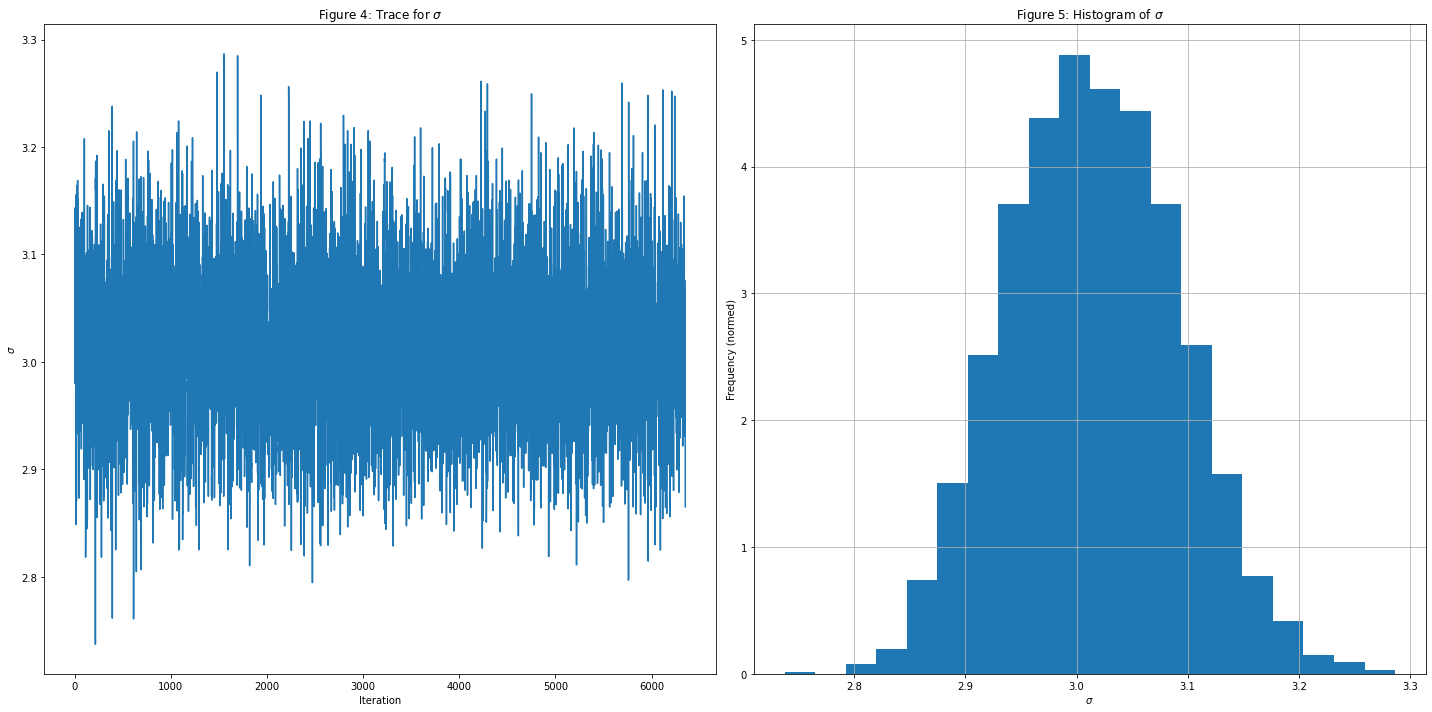

In [10]:

show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20,density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("$\sigma$")
ax.set_title("Figure 5: Histogram of $\sigma$")
fig.tight_layout()


ax.grid("off")


### ÁªìÊûú

$\sigma$ÊúÄÂèØËÉΩÁöÑÂÄºÁ∫¶‰∏∫ 3.„ÄÇ Â§öÊ¨°ËøêË°åÂèØËÉΩ‰ºö‰∏é 3.0 ÊúâÂ∞ëËÆ∏Â∑ÆÂà´„ÄÇ ÂéüÂõ†ÊòØÊàë‰ª¨Âè™ËßÇÂØü‰∫ÜÂéüÂßãÊï∞ÊçÆÁöÑ 3.33%Ôºà30,000 ‰∏™Ê†∑Êú¨‰∏≠ÁöÑ 1,000 ‰∏™Ôºâ

## È¢ÑÊµã

È¶ñÂÖàÔºåÊàë‰ª¨ÂØπ œÉ ÁöÑÂêé 75% Êé•ÂèóÊ†∑Êú¨ËøõË°åÂπ≥ÂùáÔºåÁÑ∂ÂêéÊàë‰ª¨‰ªé Œº=9.8 Âíå œÉ=3.0ÔºàÂêé 75% Êé•ÂèóÊ†∑Êú¨ÁöÑÂπ≥ÂùáÂÄºÔºâÁöÑÊ≠£ÊÄÅÂàÜÂ∏É‰∏≠ÁîüÊàê 30,000 ‰∏™ÈöèÊú∫‰∏™‰Ωì„ÄÇ

9.901522941859273 3.014757912619972


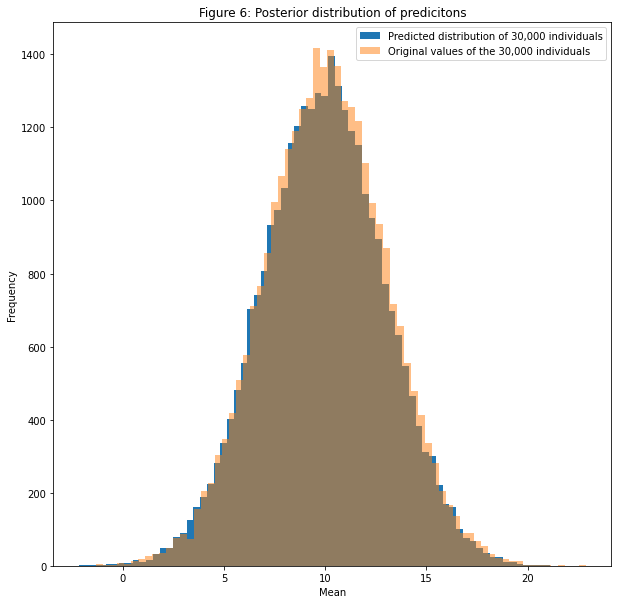

In [12]:
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(population.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=70 ,label="Predicted distribution of 30,000 individuals")
ax.hist( population,bins=70 ,alpha=0.5, label="Original values of the 30,000 individuals")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Figure 6: Posterior distribution of predicitons")
ax.legend()

# Part 3: ÂÆû‰æã

<img src="data/Sunspot1.jpg">*Credit: Amateur astronomer Alan Friedman on July 10, 2012.*

Â§™Èò≥ÈªëÂ≠êÊòØÂ§™Èò≥Ë°®Èù¢ÔºàÂÖâÁêÉÂ±ÇÔºâ‰∏äÁöÑ‰∏Ä‰∏™Âå∫ÂüüÔºåÂÖ∂ÁâπÂæÅÊòØÊ∏©Â∫¶‰Ωé‰∫éÂÖ∂Âë®Âõ¥ÁéØÂ¢É„ÄÇ Ëøô‰∫õÈôç‰ΩéÁöÑÊ∏©Â∫¶ÊòØÁî±Á£ÅÂú∫ÈÄöÈáèÈõÜ‰∏≠ÂºïËµ∑ÁöÑÔºåÁ£ÅÂú∫ÈÄöÈáèÈõÜ‰∏≠ÈÄöËøáÁ±ª‰ºº‰∫é[Ê∂°ÊµÅÂà∂Âä®Âô®](https://en.wikipedia.org/wiki/Eddy_current)ÁöÑÊïàÊûúÊäëÂà∂ÂØπÊµÅ„ÄÇ Â§™Èò≥ÈªëÂ≠êÈÄöÂ∏∏ÊàêÂØπÂá∫Áé∞Áõ∏ÂèçÁöÑÁ£ÅÊûÅ„ÄÇ ÂÆÉ‰ª¨ÁöÑÊï∞ÈáèÊ†πÊçÆÂ§ßÁ∫¶ 11 Âπ¥ÁöÑÂ§™Èò≥Ê¥ªÂä®Âë®ÊúüËÄåÂèòÂåñ„ÄÇ

Êàë‰ª¨Â∞ÜÂ§ÑÁêÜÁöÑÊï∞ÊçÆÊòØ‰ªé 1749 Âπ¥ 1 ÊúàÂà∞ 2018 Âπ¥ 11 ÊúàÁöÑÊØè‰∏™ÊúàÁöÑ‚ÄúÊØèÊúàÂπ≥ÂùáÂ§™Èò≥ÈªëÂ≠êÊÄªÊï∞‚Äù„ÄÇËøôÊòØ[‰∏ñÁïåÊï∞ÊçÆ‰∏≠ÂøÉ](http://www.sidc.be/silso/home)Êî∂ÈõÜ„ÄÅÊï¥ÁêÜÂíåÂÖ¨ÂºÄÁöÑÊï∞ÊçÆÔºåÁî®‰∫éÂà∂‰Ωú„ÄÅ‰øùÂ≠òÂíå‰º†Êí≠ÂõΩÈôÖÂ§™Èò≥ÈªëÂ≠êÊï∞„ÄÇ

## Â§™Èò≥ÈªëÂ≠êÊï∞ÂèØËßÜÂåñ

ËÆ©Êàë‰ª¨ÁªòÂà∂Â§öÂπ¥Êù•ÁöÑÊï∞ÊçÆÔºåÁúãÁúãÂàÜÂ∏ÉÊÉÖÂÜµ„ÄÇ

(3238,) (3238,)
1785.042


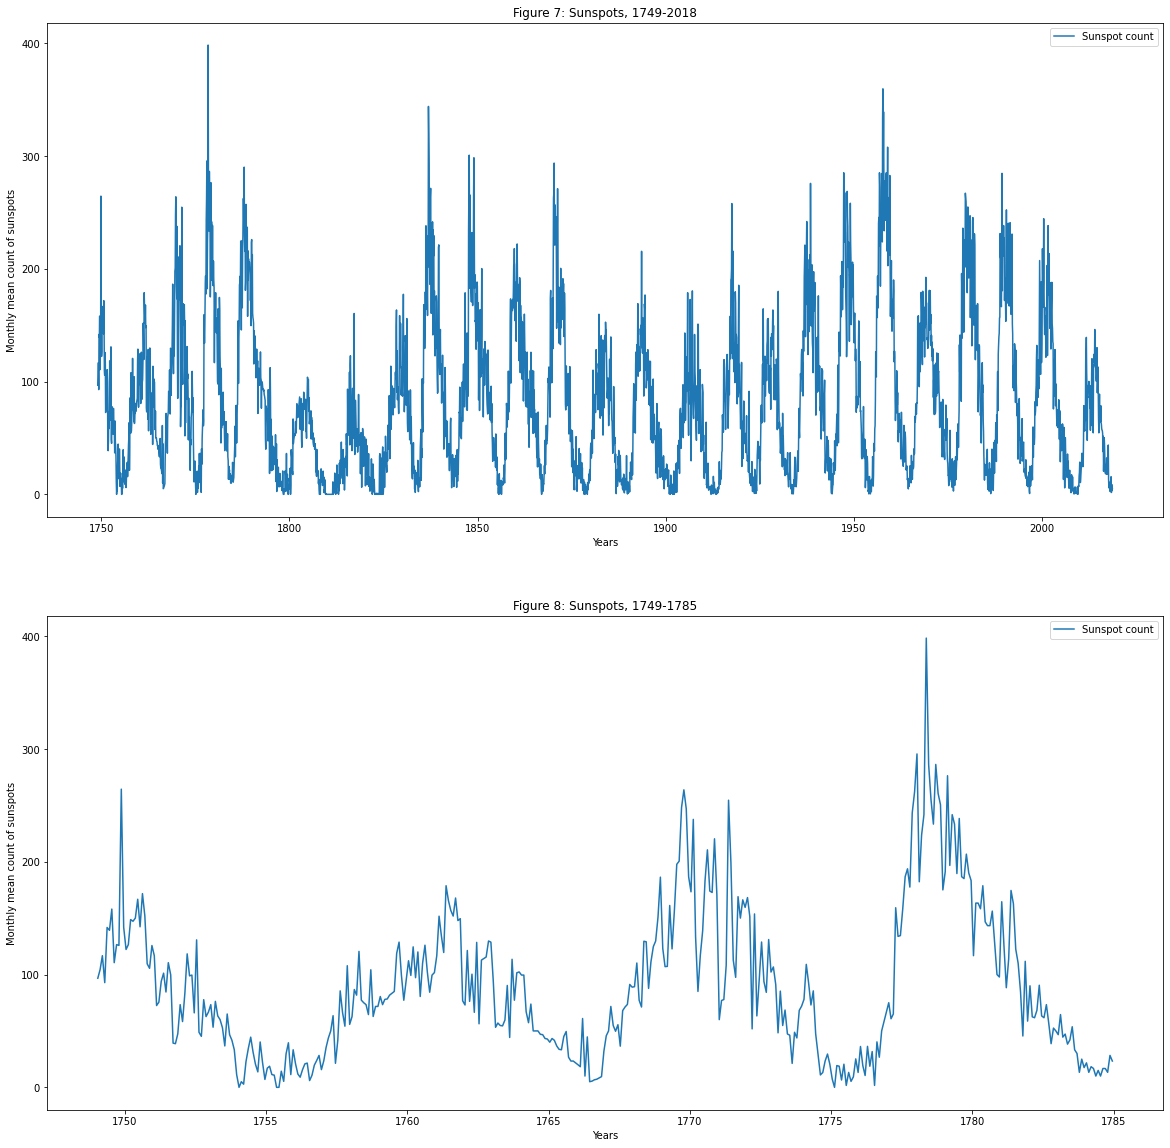

In [13]:
sunspots = np.loadtxt("data/SN_m_tot_V2.0.csv", delimiter=';')

#years is the third column
years = sunspots[:,2]
#activity is the 4th column
activity = sunspots[:,3] + 0.1
print(years.shape,activity.shape)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,1,1)

ax.plot(years, activity, label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 7: Sunspots, 1749-2018")
ax.legend()


ax = fig.add_subplot(2,1,2)
print(years[432])
ax.plot(years[:432], activity[:432], label="Sunspot count")
ax.set_yticks(np.arange(0,500,100))
ax.set_xlabel("Years")
ax.set_ylabel("Monthly mean count of sunspots")
ax.set_title("Figure 8: Sunspots, 1749-1785")
ax.legend()

## Êï∞ÊçÆÊ®°Âûã

‰ªéÊï∞ÊçÆÁúãËµ∑Êù•ÔºåÊàë‰ª¨ÂèØ‰ª•Áî®‰ºΩÈ©¨ÂàÜÂ∏ÉÂØπËøôÁßçÁé∞Ë±°ËøõË°åÂª∫Ê®°ÔºåÊØè 12 Âπ¥‰∏Ä‰∏™Êñ∞Âë®Êúü„ÄÇ

‰ºΩÈ©¨ÂàÜÂ∏É Œì ÊòØËøûÁª≠Ê¶ÇÁéáÂàÜÂ∏ÉÁöÑÂèåÂèÇÊï∞ÊóèÔºåÂèÇÊï∞ÊòØÂΩ¢Áä∂ a ÂíåÂ∞∫Â∫¶ b„ÄÇ ‰ºΩÈ©¨ÂàÜÂ∏ÉÁöÑÈöèÊú∫ÂèòÈáè X ËÆ∞‰∏∫ X~Œì(a, b)ÔºåÂú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠ÔºåX ÊòØÂ§™Èò≥ÈªëÂ≠êÁöÑÊï∞Èáè„ÄÇ ‰∏§‰∏™ÂèÇÊï∞ a Âíå b ÊòØÊàë‰ª¨Ë¶ÅËÆ°ÁÆóÂàÜÂ∏ÉÁöÑÊú™Áü•Êï∞„ÄÇ

<img src="data/gamma.PNG">*Credit: Wikipedia Commons.*

‰æãÂ¶ÇÔºåÂú®Á¨¨‰∏Ä‰∏™Âë®Êúü‰∏≠ÔºåÂ§™Èò≥ÈªëÂ≠êÊï∞Èáè‰ªé 1749 Âπ¥Â∫ïÁöÑÊúÄÈ´òÂÄºÁ∫¶ 300 ÂºÄÂßãÔºåÁÑ∂ÂêéÂú® 6 Âπ¥ÂêéÁöÑ 1755 Âπ¥‰∏ãÈôçÂà∞ÊúÄ‰ΩéÂÄº„ÄÇÁÑ∂ÂêéËØ•Êï∞Â≠óÂÜçÊ¨°‰∏äÂçáÂà∞ 1761 Âπ¥Âíå‰πãÂâçÁöÑ 1762 Âπ¥ÁöÑÊúÄÂ§ßÂÄºÔºåÂú® 1766 Âπ¥ÂÜçÊ¨°‰∏ãÈôçÔºå‰æùÊ≠§Á±ªÊé®......
 

## Â§™Èò≥ÈªëÂ≠êÊï∞ÈáèÁõ¥ÊñπÂõæ

Text(0.5, 1.0, 'Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2018)')

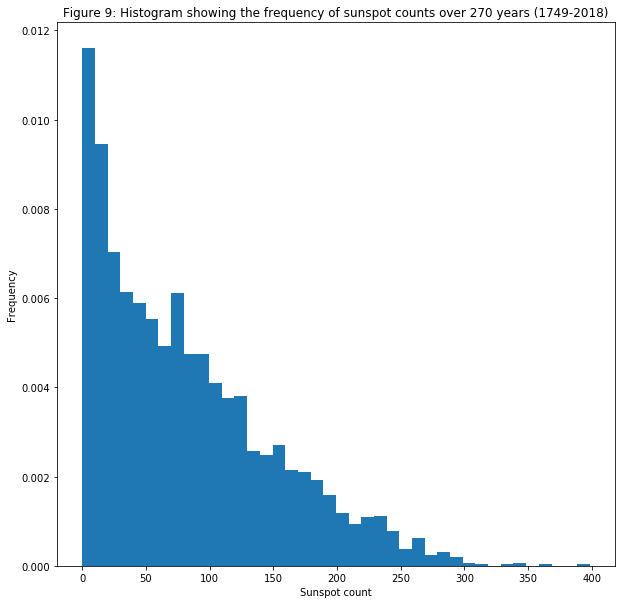

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(activity, bins=40, density=True)
ax.set_xlabel("Sunspot count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 9: Histogram showing the frequency of sunspot counts over 270 years (1749-2018)")

## ËÆ°Êï∞ÁöÑÈ¢ëÁéá‰ºº‰πéÁ°ÆÂÆûÈÅµÂæ™‰ºΩÈ©¨ÂàÜÂ∏É

‰ºΩÈ©¨ÂàÜÂ∏ÉÁöÑPDF‰∏∫$f/f(x;a,b) =\dfrac{b^a x^{a-1}e^{-b x}}{\Gamma{(a)}}$ÔºåÂÖ∂‰∏≠$\Gamma$‰∏∫‰ºΩÈ©¨ÂáΩÊï∞Ôºå$\Gamma{(a)}=(a-1)!$„ÄÇ

ÊåâÁÖß‰∏éËôöÊãüÊï∞ÊçÆÁ§∫‰æã‰∏≠Áõ∏ÂêåÁöÑËøáÁ®ãÔºåÊàë‰ª¨ÂèØ‰ª•ÂÜôÂá∫Ê≠§ PDF ÁöÑÂØπÊï∞‰ººÁÑ∂ÔºàËØ∑ÂèÇËßÅ‰∏ãÈù¢ÁöÑ‰ª£Á†ÅÔºâ„ÄÇ ÊàñËÄÖÔºåÂèØ‰ª•‰ΩøÁî® `scipy.stats.gamma(a,b).pdf(x)` ÂáΩÊï∞Êù•ËÆ°ÁÆó„ÄÇ

Áî±‰∫é a Âíå b ÂøÖÈ°ª‰∏∫Ê≠£ÔºåÊàë‰ª¨Âú®ÂÖàÈ™å‰∏≠Âº∫Âà∂ÊâßË°åÊ≠§Êìç‰Ωú„ÄÇ

In [14]:
transition_model = lambda x: np.random.normal(x,[0.05,5],(2,))
import math
def prior(w):
    if(w[0]<=0 or w[1] <=0):
        return 0
    else:
        return 1
    
def manual_log_lik_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_lik_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data)))    


In [17]:
accepted, rejected = metropolis_hastings(manual_log_lik_gamma,prior,transition_model,[4, 10], 50000,activity,acceptance)

In [18]:
print(accepted.shape)
accepted[-10:]

(8446, 2)


array([[ 1.01980394, 80.72802272],
       [ 0.973146  , 85.81271741],
       [ 1.00523705, 81.58749452],
       [ 0.95835592, 85.00806401],
       [ 0.97506922, 83.38147929],
       [ 1.00833297, 83.21767739],
       [ 0.95311644, 85.21549196],
       [ 0.96073557, 87.41470703],
       [ 0.94937167, 86.15658977],
       [ 0.94320714, 87.13644186]])

‰ªéa=4Ôºåb=10ÂºÄÂßãÔºåÁÆóÊ≥ïÊé•Âèó‰∫Ü8446ÂØπÊ†∑Êú¨ÔºåaÁöÑÊúÄÂêé‰∏Ä‰∏™ÂÄº‰∏∫0.94320714ÔºåbÁöÑÊúÄÂêé‰∏Ä‰∏™ÂÄº‰∏∫87.13644186Ôºå‰∏éÂàùÂßãÂÄºÁõ∏Â∑ÆÁîöËøú„ÄÇ


## ÁªìÊûúÂàÜÊûê

Text(0.5, 1.0, 'Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.')

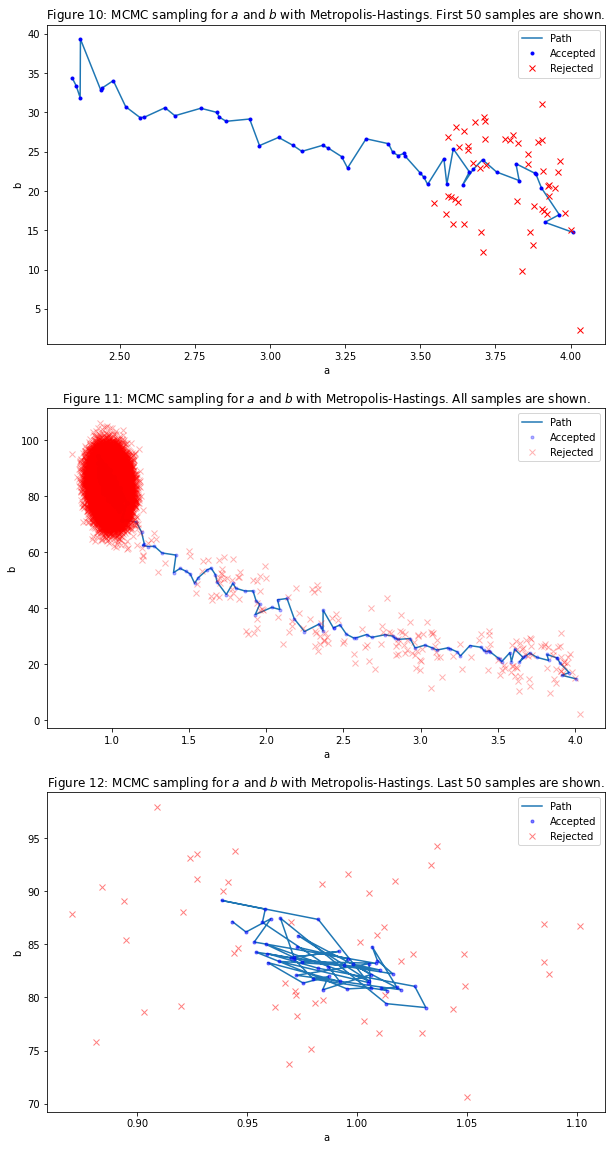

In [19]:

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax.plot(accepted[:50,0], accepted[:50,1], label="Path")
ax.plot(accepted[:50,0], accepted[:50,1], 'b.', label='Accepted')
ax.plot(rejected[:50,0], rejected[:50,1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 10: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown.")  


ax = fig.add_subplot(3,1,2)
ax.plot(accepted[:,0], accepted[:,1], label="Path")
ax.plot(accepted[:,0], accepted[:,1], 'b.', label='Accepted',alpha=0.3)
ax.plot(rejected[:,0], rejected[:,1], 'rx', label='Rejected',alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 11: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. All samples are shown.") 

to_show=50
ax = fig.add_subplot(3,1,3)
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], label="Path")
ax.plot(accepted[-to_show:,0], accepted[-to_show:,1], 'b.', label='Accepted',alpha=0.5)
ax.plot(rejected[-to_show:,0], rejected[-to_show:,1], 'rx', label='Rejected',alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure 12: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. Last 50 samples are shown.") 

Ê≠£Â¶ÇÊàë‰ª¨‰ªéÂõæ 10„ÄÅ11 Âíå 12 ‰∏≠ÁúãÂà∞ÁöÑÈÇ£Ê†∑ÔºåËØ•ÁÆóÊ≥ïÂø´ÈÄüÊî∂ÊïõÂà∞ [a=1,b=83] Âå∫Âüü„ÄÇ

ÊèêÁ§∫ÔºöÂΩìÁÆóÊ≥ïÂºÄÂßã‰∏•ÈáçÊãíÁªùÊ†∑Êú¨Êó∂ÔºåËøôÊÑèÂë≥ÁùÄÊàë‰ª¨Â∑≤ÁªèËææÂà∞‰∫ÜÂèØËÉΩÊÄßÁöÑÈ•±ÂíåÂå∫Âüü„ÄÇ ÈÄöÂ∏∏ÔºåËøôÂèØ‰ª•Ëß£Èáä‰∏∫Â∑≤ËææÂà∞Êàë‰ª¨ÂèØ‰ª•‰ªé‰∏≠ÈááÊ†∑ÁöÑÊúÄ‰Ω≥ÂèÇÊï∞Á©∫Èó¥ÔºåÂç≥ÁÆóÊ≥ïÂá†‰πéÊ≤°ÊúâÁêÜÁî±Êé•ÂèóÊñ∞ÂÄº„ÄÇ ËøôÂú®Âõæ 11 Âíå 12 ‰∏≠Ê†áÂá∫ÔºåÂÖ∂‰∏≠ÁÆóÊ≥ï‰∏çÂÜçÊé•ÂèóÂ∞èËåÉÂõ¥‰πãÂ§ñÁöÑ‰ªª‰ΩïÂÄº„ÄÇ

### Â∞ÜÊúÄÂàù50%ÁöÑÂÄºËßÜ‰∏∫"burn-in"Âπ∂ÂéªÈô§

### ÂèØËßÜÂåñ a Âíå b ÁöÑËøπÁ∫ø‰ª•ÂèäËøπÁ∫øÁöÑÁõ¥ÊñπÂõæ

Text(0.5, 1.0, '2D histogram showing the joint distribution of $a$ and $b$')

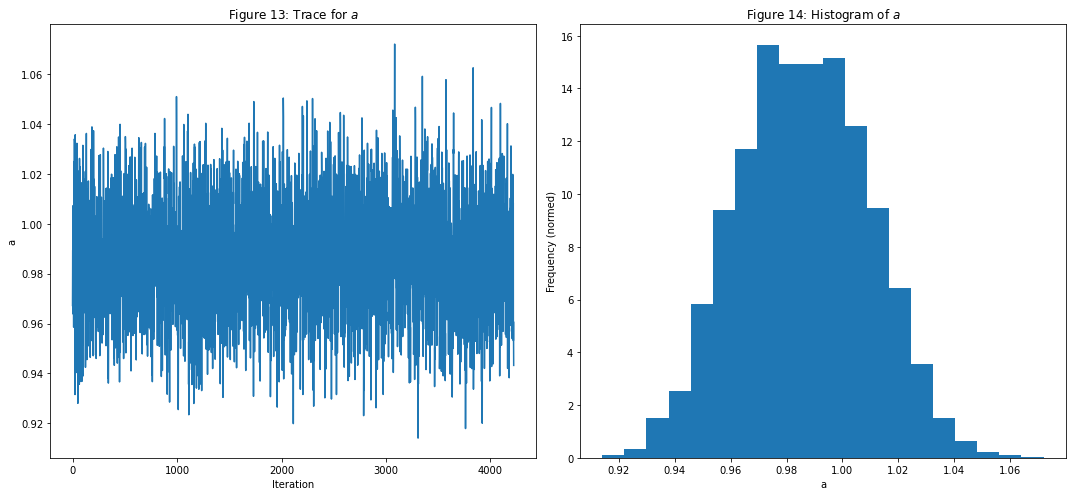

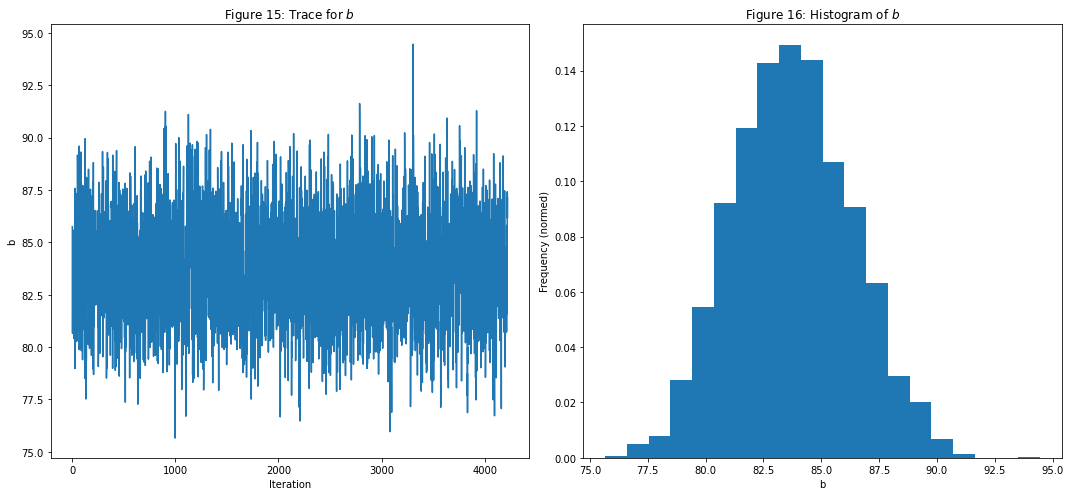

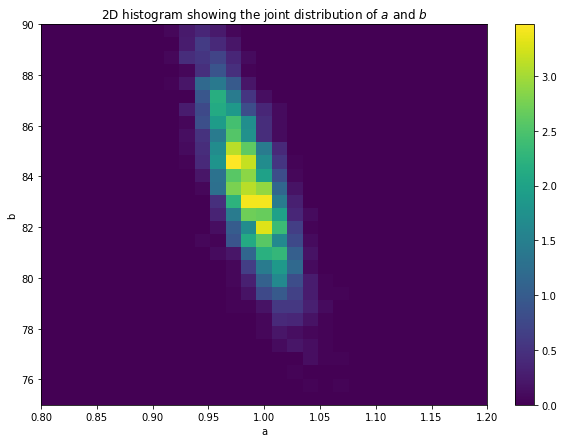

In [20]:
show=int(-0.5*accepted.shape[0])
hist_show=int(-0.50*accepted.shape[0])


fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,0])
ax.set_title("Figure 13: Trace for $a$")
ax.set_xlabel("Iteration")
ax.set_ylabel("a")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,0], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("a")
ax.set_title("Figure 14: Histogram of $a$")
fig.tight_layout()

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 15: Trace for $b$")
ax.set_xlabel("Iteration")
ax.set_ylabel("b")
ax = fig.add_subplot(1,2,2)
ax.hist(accepted[hist_show:,1], bins=20, density=True)
ax.set_ylabel("Frequency (normed)")
ax.set_xlabel("b")
ax.set_title("Figure 16: Histogram of $b$")
fig.tight_layout()

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1,1,1)
xbins, ybins = np.linspace(0.8,1.2,30), np.linspace(75,90,30)
counts, xedges, yedges, im = ax.hist2d(accepted[hist_show:,0], accepted[hist_show:,1], density=True, bins=[xbins, ybins])
ax.set_xlabel("a")
ax.set_ylabel("b")
fig.colorbar(im, ax=ax)
ax.set_title("2D histogram showing the joint distribution of $a$ and $b$")

## È¢ÑÊµã

È¶ñÂÖàÔºåÊàë‰ª¨ÂØπ a Âíå b ÁöÑÊúÄÂêé 50% Êé•ÂèóÊ†∑Êú¨ËøõË°åÂπ≥ÂùáÔºåÁÑ∂Âêé‰ªé Œì ÂàÜÂ∏É‰∏≠ÁîüÊàêÈöèÊú∫‰∏™‰Ωì„ÄÇ $a_{average}$=0.9860918140184449Ôºå $b_{average}$=83.74427720088335„ÄÇ

0.9860918140184449 83.74427720088335


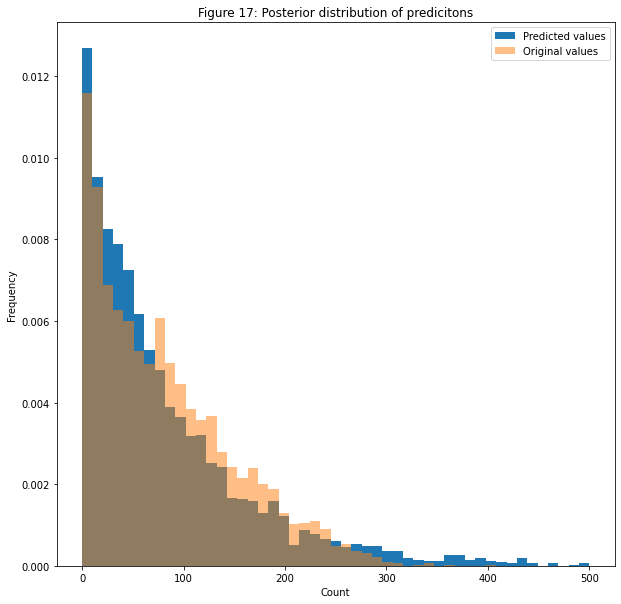

In [21]:
show=-int(0.5*accepted.shape[0])

mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)
model = lambda t,mu,sigma:np.random.gamma(mu,sigma,t)
t=np.arange(activity.shape[0])
observation_gen=model(t.shape[0],mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)



ax.hist( observation_gen,bins=np.linspace(0,500,50) ,density=True,label="Predicted values")
ax.hist( activity,bins=np.linspace(0,500,50) ,alpha=0.5,density=True, label="Original values")
ax.set_xlabel("Count")
ax.set_ylabel("Frequency")
ax.set_title("Figure 17: Posterior distribution of predicitons")
ax.legend()

## ËØÑ‰ª∑
### ËØÑ‰º∞proposalÂàÜÂ∏É

Êàë‰ª¨Â¶Ç‰ΩïÊåáÂÆöÂàÜÂ∏É Q ÁöÑÂèÇÊï∞Ôºü Êàë‰ª¨Â∫îËØ•ËøúÁ¶ªÂΩìÂâçÊ†∑Êú¨ Œ∏ ËøòÊòØ‰øùÊåÅÁõ∏ÂØπÊé•ËøëÔºü Ëøô‰∫õÈóÆÈ¢òÂèØ‰ª•ÈÄöËøáÊµãÈáèÊé•ÂèóÊ†∑Êú¨‰πãÈó¥ÁöÑËá™Áõ∏ÂÖ≥Êù•ÂõûÁ≠îÔºöÊàë‰ª¨‰∏çÂ∏åÊúõÊé•ÂèóÊ†∑Êú¨‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÂ§™È´ò„ÄÇ Êàë‰ª¨‰∏çÂ∏åÊúõËøúË∑ùÁ¶ªÊ†∑Êú¨Ëøá‰∫éÁõ∏ÂÖ≥ÔºåÂõ†‰∏∫Êàë‰ª¨Ê≠£Âú®Â∞ùËØïÂÆûÁé∞È©¨Â∞îÂèØÂ§´ÈìæÔºåÂç≥‰∏Ä‰∏™Ê†∑Êú¨Â∫îËØ•Âè™‰æùËµñ‰∫éÂÆÉ‰πãÂâçÁöÑÊ†∑Êú¨ÔºåÂπ∂‰∏îËá™Áõ∏ÂÖ≥ÂõæÂ∫îËØ•ÊòæÁ§∫Ê†∑Êú¨Áõ∏ÂÖ≥ÊÄß‰πãÈó¥ÁöÑÂø´ÈÄüÊåáÊï∞‰∏ãÈôç i Âíå i-1,i-2,...i-n

Ëá™Áõ∏ÂÖ≥ÊòØÈÄöËøá‰∏∫ÊØè‰∏™ÊªûÂêé $k$ ËÆ°ÁÆó‰ª•‰∏ãÂáΩÊï∞Êù•ÂÆö‰πâÁöÑ:
$r_k=\dfrac{\sum_{i=1}^{N-k}(Y_i-Y_{avg})(Y_{i+k}-Y_{avg})}{\sum_{i=1}^{N}(Y_i-Y_{avg})^2}$

ÊªûÂêé $k$ Âü∫Êú¨‰∏äÊòØÊ†∑Êú¨ $Y_i$ Âë®Âõ¥ÁöÑ*ËåÉÂõ¥*ÔºåÊàë‰ª¨ÊÉ≥Âú®ÂÖ∂‰∏≠ÊµãÈáèÁõ∏ÂÖ≥ÊÄß„ÄÇ

‰∏ãÂõæÊòæÁ§∫‰∫Ü k ‰ªé 1 Âà∞ 100 ÁöÑ a„ÄÅb ÁöÑËá™Áõ∏ÂÖ≥„ÄÇk=1 ÁöÑÊªûÂêéÊÑèÂë≥ÁùÄÊàë‰ª¨Ê≠£Âú®ÊµãÈáèÊ†∑Êú¨‰∏éÂÖ∂Ëá™Ë∫´ÁöÑÁõ∏ÂÖ≥ÊÄßÔºåÂõ†Ê≠§Êàë‰ª¨ÊúüÊúõÂÆÉÁ≠â‰∫é 1„ÄÇ k Ë∂äÈ´òÔºåÁõ∏ÂÖ≥ÊÄßÂ∫îËØ•Ë∂ä‰Ωé„ÄÇ

0.9860918140184449 83.74427720088335


[Text(0.5, 0, 'lag'), Text(0, 0.5, 'autocorrelation'), (-0.1, 1.0)]

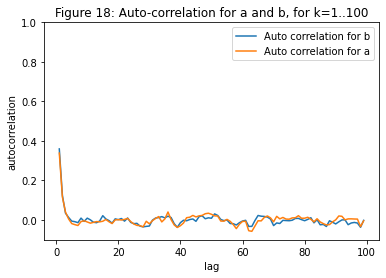

In [22]:
mean_acc_0=accepted[show:,0].mean()
mean_acc_1=accepted[show:,1].mean()
print(mean_acc_0,mean_acc_1)

lag=np.arange(1,100)
def autocorr(accepted,lag):
    num_0=0
    denom_0=0
    num_1=0
    denom_1=0
    for i in range(accepted.shape[0]-lag):
        num_0+=(accepted[i,0]-mean_acc_0)*(accepted[i+lag,0]-mean_acc_0)
        num_1+=(accepted[i,1]-mean_acc_1)*(accepted[i+lag,1]-mean_acc_1)
        denom_0+=(mean_acc_0-accepted[i,0])**2
        denom_1+=(mean_acc_1-accepted[i,1])**2
    rk_0=num_0/denom_0
    rk_1=num_1/denom_1
    return rk_0, rk_1


accepted_reversed=accepted[show:,:]
result=np.zeros((2,lag.shape[0]))
#print(lag)
for l in lag:
    result[:,l-1]=autocorr(accepted_reversed,l)
    
    
###Instead of writing an autocorrelation function, one could simply use thee autocorr function provided in pymc3    
#from pymc3.stats import autocorr

fig, ax = plt.subplots()
#ax.plot(lag, [autocorr(accepted[show:,1], l) for l in lags], label='auto b')
#ax.plot(lag, [autocorr(accepted[show:,0], l) for l in lags], label='auto a')
ax.plot(lag, result[1,:], label='Auto correlation for b')
ax.plot(lag, result[0,:], label='Auto correlation for a')
ax.legend(loc=0)
ax.set_title("Figure 18: Auto-correlation for a and b, for k=1..100")
ax.set(xlabel='lag', ylabel='autocorrelation', ylim=(-.1, 1))


Âú®Êàë‰ª¨ÁöÑ‰æãÂ≠ê‰∏≠ÔºåÊàë‰ª¨ÂæàÂπ∏ËøêÊúâË∂≥Â§ü‰ΩéÁöÑÁõ∏ÂÖ≥ÊÄß„ÄÇ ÈÄöÂ∏∏ÔºåÊàë‰ª¨ÂèØËÉΩÂ∏åÊúõËá™Âä®ËÆæÁΩÆproposalÂàÜÂ∏ÉÁöÑÂèÇÊï∞ QÔºå‰∏ÄÁßçÂ∏∏ËßÅÁöÑÊñπÊ≥ïÊòØ‰∏çÊñ≠Ë∞ÉÊï¥proposalÂèÇÊï∞Ôºå‰ª•‰æøÊãíÁªùË∂ÖËøá 50% ÁöÑproposal„ÄÇ ÊàñËÄÖÔºåÂèØ‰ª•‰ΩøÁî®Áß∞‰∏∫ Hamiltonian Monte Carlo ÁöÑÂ¢ûÂº∫Áâà MCMCÔºåÂÆÉÂèØ‰ª•Èôç‰ΩéËøûÁª≠ÈááÊ†∑Áä∂ÊÄÅ‰πãÈó¥ÁöÑÁõ∏ÂÖ≥ÊÄßÂπ∂Êõ¥Âø´Âú∞ËææÂà∞Âπ≥Á®≥ÂàÜÂ∏É„ÄÇ

## ÁªìËÆ∫

ËôΩÁÑ∂Ëøô‰∏™ÁÆóÊ≥ïËÉåÂêéÁöÑÊäΩË±°‰πç‰∏ÄÁúã‰ºº‰πéÈöæ‰ª•ÁêÜËß£Ôºå‰ΩÜÂÆûÁé∞Ëµ∑Êù•ÂÆûÈôÖ‰∏äÈùûÂ∏∏ÁÆÄÂçïÔºåËÄå‰∏îÊïàÊûúÈùûÂ∏∏Â•Ω„ÄÇ ‰∫ãÂÆû‰∏äÔºåÂÖ≥‰∫éÊ¶ÇÁéáÁºñÁ®ãÔºåÁâπÂà´ÊòØ MCMC ÁöÑ‰ºüÂ§ß‰πãÂ§ÑÂú®‰∫é‰Ω†Âè™ÈúÄË¶ÅÂÜô‰∏ãÊ®°ÂûãÁÑ∂ÂêéËøêË°åÂÆÉ„ÄÇÊó†ÈúÄËÆ°ÁÆóËØÅÊçÆÔºåÊàñÁ°Æ‰øùÊüê‰∫õÁ∫¶ÊùüÊÄßÊï∞Â≠¶Â±ûÊÄß„ÄÇ



## ËµÑÊñô

Peter Driscoll, "A comparison of least-squares and Bayesian fitting techniques to radial velocity data sets" 

Carson Chow, "MCMC and fitting models to data"

John H. Williamson, "Data Fundamentals - Probabilities"

Simon Rogers, "A first course in machine learning"